In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
df= pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df= df.drop('Unnamed: 0', axis=1)

In [4]:
# Creating Normalising function
def norm_func(i):
    x= (i-i.min())/(i.max()-i.mean())
    return (x)

In [5]:
# Normalising df
df_norm = norm_func(df)
df_norm

,Murder,Assault,UrbanPop,Rape
0,1.290054,1.148941,1.021210,0.561208
1,0.957137,1.311357,0.628437,1.501938
2,0.759467,1.497834,1.885310,0.956880
3,0.832293,0.872233,0.706991,0.492571
4,0.853100,1.389557,2.317361,1.344477
5,0.738660,0.956449,1.806756,1.267765
6,0.260092,0.391001,1.767478,0.153424
7,0.530587,1.160972,1.571092,0.343185
8,1.518935,1.744466,1.885310,0.993217
9,1.727008,0.998556,1.099764,0.746932


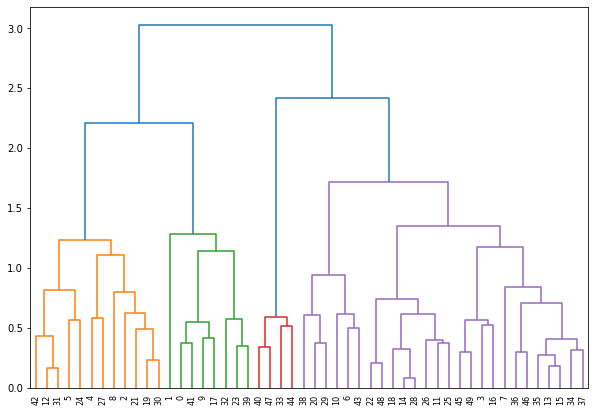

In [6]:
# Creating dendogram
plt.figure(figsize=(10,7))
dendogram = sch.dendrogram(sch.linkage(df_norm,'complete'))

In [7]:
# Creating clusters
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster

AgglomerativeClustering(n_clusters=3)

In [8]:
cluster.fit_predict(df_norm)

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [9]:
# Adding clusters to dataset
df['cluster']= cluster.labels_

In [10]:
df

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [11]:
df.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,12.577778,262.388889,67.777778,28.688889
1,1,6.200000,143.095238,71.142857,19.985714
2,2,2.981818,73.636364,51.181818,11.409091


In [ ]:
#Plotting cluster
plt.figure(figsize=())